# TOC

__Lab 01 - Basic exploratory data analysis and modeling__
1. [Import](#Import)
1. [Basic machine learning process](#Basic-machine-learning-process)
    1. [Example 1 - Titanic dataset](#Basic-machine-learning-process-Example1)
        1. [Exploratory data analysis](#Basic-machine-learning-process-EDA)
        1. [Clean data](#Basic-machine-learning-process-data-preparation)
        1. [Encode categorical features](#Basic-machine-learning-process-encode)
        1. [Model](#Basic-machine-learning-process-model)

# Import

<a id="Import"></a>

In [1]:
import numpy as np

np.set_printoptions(threshold=np.inf)
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os

%matplotlib inline

import warnings

warnings.simplefilter("ignore")
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:78% !important; }</style>"))

from sklearn import datasets, svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression

# Basic machine learning process

<a id="Basic-machine-learning-process"></a>

## Example 1 - Titanic dataset analysis

Using Titanic dataset:
- Perform exploratory data analysis.
- Prepare for modeling by dropping extraneous columns.
- Encode categorical columnes using both OneHotEncoder and pd.get_dummies.
- Evaluate model using test data.
- Submit test set predictions to Kaggle.


<a id="Basic-machine-learning-process-Example1"></a>

In [2]:
# load data - Titanic`
df = pd.read_csv("s3://tdp-ml-datasets/kaggle-titanic//train.csv")

In [3]:
# inspect
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# dataset summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Exploratory data analysis


<a id="Basic-machine-learning-process-EDA"></a>

Text(0.5, 1.0, 'Passengers per boarding location')

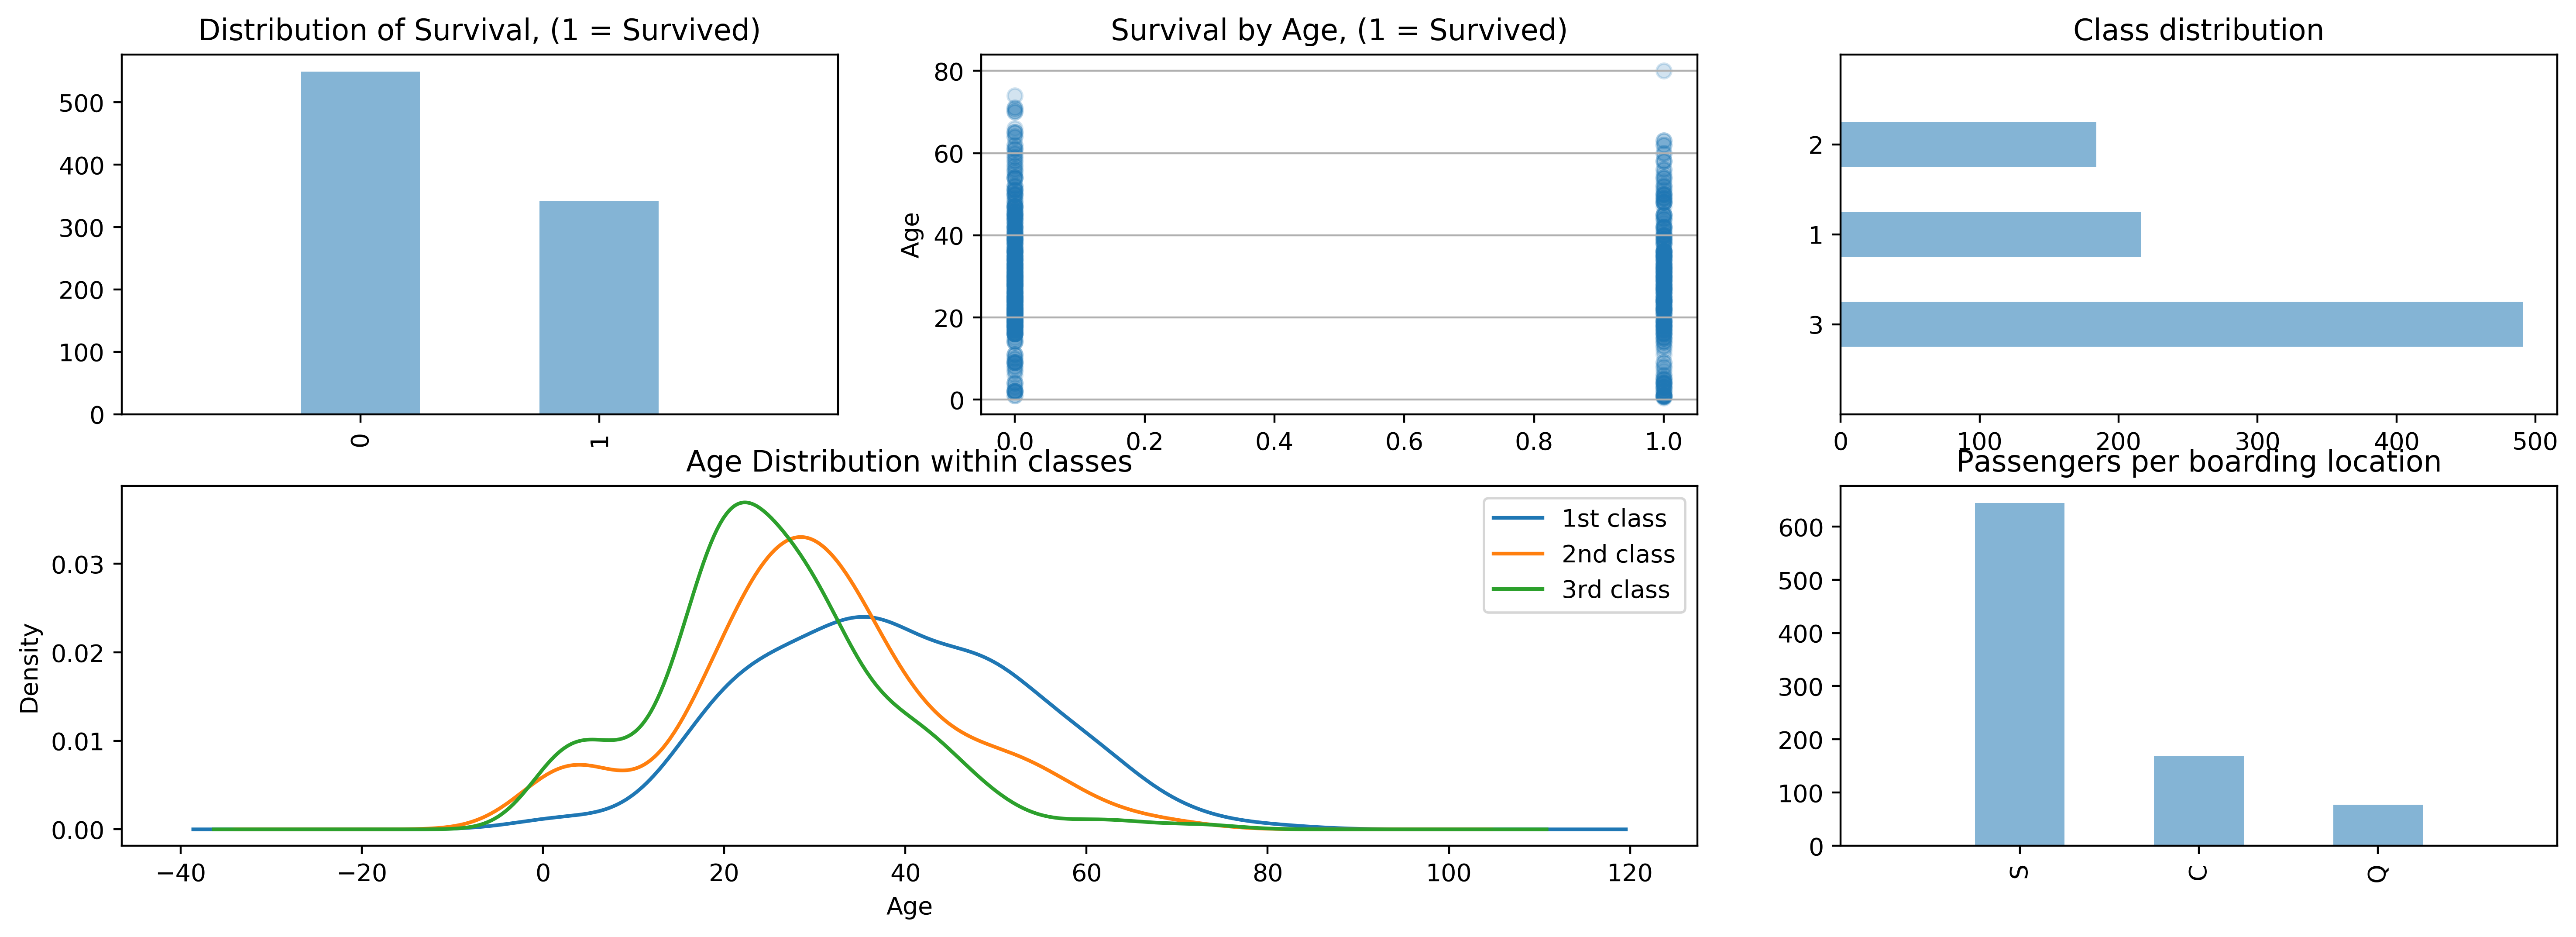

In [5]:
# visualize distribution of select variables
fig = plt.figure(figsize=(18, 6), dpi=400)
alpha = alpha_scatterplot = 0.2
alpha_bar_chart = 0.55

# plot 1
ax1 = plt.subplot2grid((2, 3), (0, 0))
df.Survived.value_counts().plot(kind="bar", alpha=alpha_bar_chart)
ax1.set_xlim(-1, 2)
plt.title("Distribution of Survival, (1 = Survived)")

# plot 2
plt.subplot2grid((2, 3), (0, 1))
plt.scatter(df.Survived, df.Age, alpha=alpha_scatterplot)
plt.ylabel("Age")
plt.grid(b=True, which="major", axis="y")
plt.title("Survival by Age, (1 = Survived)")

# plot 3
ax3 = plt.subplot2grid((2, 3), (0, 2))
df.Pclass.value_counts().plot(kind="barh", alpha=alpha_bar_chart)
ax3.set_ylim(-1, len(df.Pclass.value_counts()))
plt.title("Class distribution")

# plot 4
plt.subplot2grid((2, 3), (1, 0), colspan=2)
df.Age[df.Pclass == 1].plot(kind="kde")
df.Age[df.Pclass == 2].plot(kind="kde")
df.Age[df.Pclass == 3].plot(kind="kde")
plt.xlabel("Age")
plt.title("Age Distribution within classes")
plt.legend(("1st class", "2nd class", "3rd class"), loc="best")

# plot 5
ax5 = plt.subplot2grid((2, 3), (1, 2))
df.Embarked.value_counts().plot(kind="bar", alpha=alpha_bar_chart)
ax5.set_xlim(-1, len(df.Embarked.value_counts()))
plt.title("Passengers per boarding location")

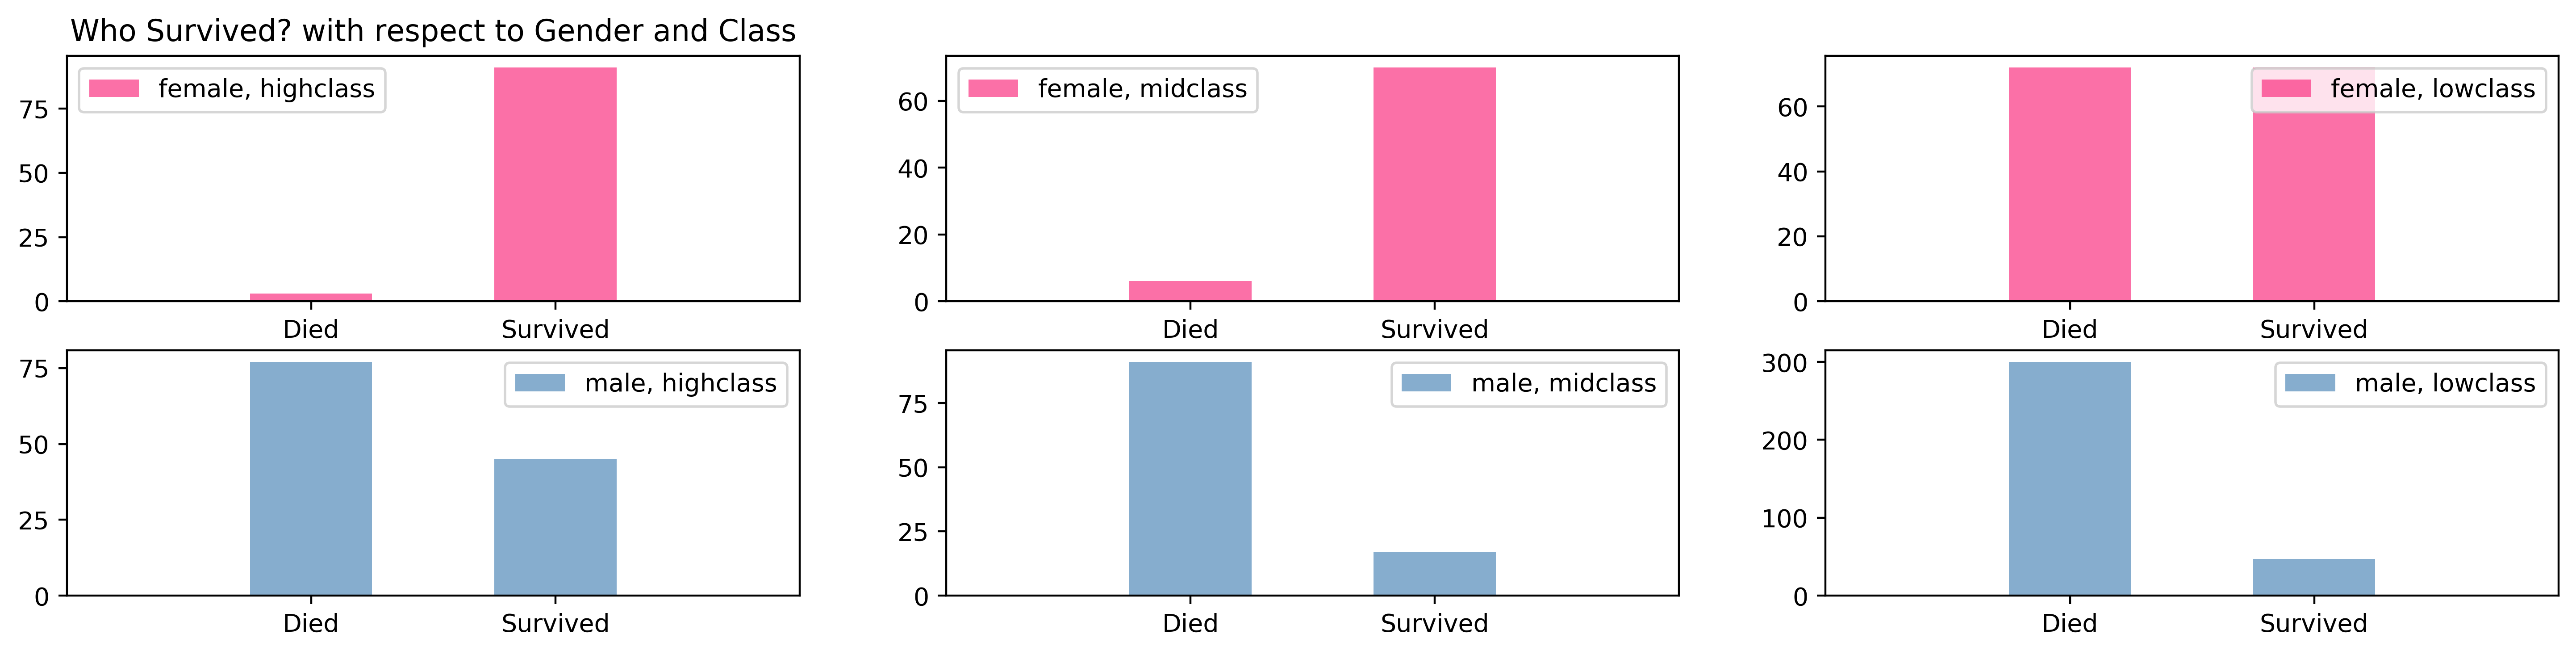

In [6]:
# visualize outcome by gender/class
fig = plt.figure(figsize=(18, 4), dpi=400)
alpha_level = 0.65

ax1 = fig.add_subplot(231)
female_highclass = (
    df["Survived"][(df["Sex"] == "female") & (df["Pclass"] == 1)]
    .value_counts()
    .sort_index()
)
female_highclass.plot(
    kind="bar", label="female, highclass", color="#FA2479", alpha=alpha_level
)
ax1.set_xticklabels(["Died", "Survived"], rotation=0)
ax1.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class")
plt.legend(loc="best")

ax2 = fig.add_subplot(232)
female_midclass = (
    df["Survived"][(df["Sex"] == "female") & (df["Pclass"] == 2)]
    .value_counts()
    .sort_index()
)
female_midclass.plot(
    kind="bar", label="female, midclass", color="#FA2479", alpha=alpha_level
)
ax2.set_xticklabels(["Died", "Survived"], rotation=0)
ax2.set_xlim(-1, len(female_midclass))
plt.legend(loc="best")

ax3 = fig.add_subplot(233)
female_lowclass = (
    df["Survived"][(df["Sex"] == "female") & (df["Pclass"] == 3)]
    .value_counts()
    .sort_index()
)
female_lowclass.plot(
    kind="bar", label="female, lowclass", color="#FA2479", alpha=alpha_level
)
ax3.set_xticklabels(["Died", "Survived"], rotation=0)
ax3.set_xlim(-1, len(female_lowclass))
plt.legend(loc="best")

ax4 = fig.add_subplot(234)
male_highclass = (
    df["Survived"][(df["Sex"] == "male") & (df["Pclass"] == 1)]
    .value_counts()
    .sort_index()
)
male_highclass.plot(
    kind="bar", label="male, highclass", alpha=alpha_level, color="steelblue"
)
ax4.set_xticklabels(["Died", "Survived"], rotation=0)
ax4.set_xlim(-1, len(male_highclass))
plt.legend(loc="best")

ax5 = fig.add_subplot(235)
male_midclass = (
    df["Survived"][(df["Sex"] == "male") & (df["Pclass"] == 2)]
    .value_counts()
    .sort_index()
)
male_midclass.plot(
    kind="bar", label="male, midclass", alpha=alpha_level, color="steelblue"
)
ax5.set_xticklabels(["Died", "Survived"], rotation=0)
ax5.set_xlim(-1, len(male_midclass))
plt.legend(loc="best")

ax6 = fig.add_subplot(236)
male_lowclass = (
    df["Survived"][(df["Sex"] == "male") & (df["Pclass"] == 3)]
    .value_counts()
    .sort_index()
)
male_lowclass.plot(
    kind="bar", label="male, lowclass", alpha=alpha_level, color="steelblue"
)
ax6.set_xticklabels(["Died", "Survived"], rotation=0)
ax6.set_xlim(-1, len(male_lowclass))
plt.legend(loc="best")

### Clean data

- Drop the 'ticket' column - does not appear to be insightful
- Drop the 'cabin' column - mostly null
- Drop 'name' column - though a more complex analysis may try to distil insights from titles and such
- Drop any rows with a null value
- Rearrange columns
- Creat feature and label arrays

<a id="Basic-machine-learning-process-data-preparation"></a>

In [7]:
# drop ticket and cabin columns
df = df.drop(["Ticket", "Cabin"], axis=1)

In [8]:
# drop rows with 1 or more nulls
df = df.dropna()

In [9]:
# select subset of columns
df = df[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "Survived"]]

In [10]:
# create train and test data sets
xTrain = df.iloc[:, :-1]
yTrain = df.iloc[:, -1]
print("xTrain dimensions: {0}".format(xTrain.shape))
print("y dimensions: {0}".format(yTrain.shape))

xTrain dimensions: (712, 7)
y dimensions: (712,)


### Encode categorical features


<a id="Basic-machine-learning-process-encode"></a>

__OneHotEncoder()__
- One hot encoder 'pivots' each of the categorical columns. 
- Each column in the array corresponds to a unique value in a categorical feature.
    - For example, if the original column has three unique categorical values, there will be three columns in the array for that feature. 
- A '1' indicates that the sample has that category value in the original column.
- Note - creates collinearity issues since the set of columns created by OHE can com

In [11]:
# review categorical feature values
catCols = ["Pclass", "Sex", "Embarked"]
for cat in catCols:
    print("[{0}] unique values:   {1}".format(cat, xTrain[cat].unique()))

[Pclass] unique values:   [3 1 2]
[Sex] unique values:   ['male' 'female']
[Embarked] unique values:   ['S' 'C' 'Q']


In [12]:
# encode categorical feature values - transform categorical columns to numerical values
le = LabelEncoder()
for cat in catCols:
    xTrain[cat] = le.fit_transform(xTrain[cat])

for cat in catCols:
    print("[{0}] unique values:   {1}".format(cat, xTrain[cat].unique()))

[Pclass] unique values:   [2 0 1]
[Sex] unique values:   [1 0]
[Embarked] unique values:   [2 0 1]


In [13]:
# set up OHE
ohe = OneHotEncoder()
catOhe = ohe.fit_transform(xTrain[catCols]).toarray()
catOhe[:5]

array([[0., 0., 1., 0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1., 0., 0., 1.]])

In [14]:
# combine numerical columns with OHE categorical columns
numCols = ["Age", "SibSp", "Parch", "Fare"]
nums = np.array(df[numCols])

In [15]:
# combine encoded categorical features and numerical feauters
xTrain = np.concatenate((catOhe, nums), axis=1)

__pd.get_dummies()__
- Converts all categorical columns to binary columns.
- Can choose to drop the first column of each group of binary columns, avoiding multicollinearity issues that accompany including all columns.

In [16]:
# utilize pandas get-dummies()
xTrain = df.iloc[:, :-1]
xTrain = pd.get_dummies(xTrain, columns=catCols)
xTrain.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


### Model
- Prepare test data in the same way training data was prepared.
- Create Logistic regression model.
- Use model to create predictions, export to .csv for Kaggle submission.

<a id="Basic-machine-learning-process-model"></a>

In [17]:
# load test data and prepare data
dfTest = pd.read_csv("s3://tdp-ml-datasets/kaggle-titanic//train.csv")
xTest = dfTest[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]
catCols = ["Pclass", "Sex", "Embarked"]
xTest = pd.get_dummies(xTest, columns=catCols)

> Remarks - Commented line is used for instances where test set has categorical value not present in training set.


In [18]:
# fill nulls in 'age' and 'fare' with average value of respective columns
xTest[xTest.loc[:, "Age"].isnull()] = df.loc[:, "Age"].mean()
xTest[xTest.loc[:, "Fare"].isnull()] = df.loc[:, "Fare"].mean()

In [19]:
# review training data formatting
xTrain.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [20]:
# review test data formatting
xTest.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1.0,0.0,7.2500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,38.0,1.0,0.0,71.2833,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,26.0,0.0,0.0,7.9250,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,35.0,1.0,0.0,53.1000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,35.0,0.0,0.0,8.0500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [21]:
# build logistic regression model
logReg = LogisticRegression()
logReg.fit(xTrain, yTrain)
print("Accuracy: {0}".format(np.round(logReg.score(xTrain, yTrain), 3)))

Accuracy: 0.802


In [22]:
# test set predictions
yPred = logReg.predict(xTest)

In [23]:
# kaggle submission
predictions = pd.DataFrame({"PassengerId": dfTest["PassengerId"], "Survived": yPred})
predictions.to_csv("s3://tdp-ml-datasets/kaggle-titanic//titanic_predictions.csv", index=False)